In [1]:
import pandas as pd
import numpy as np

In [2]:
db = pd.read_csv('lec07.csv')
db

,Hours,Score
0,1,48
1,1,78
2,1,72
3,2,70
4,2,66
5,3,92
6,4,93
7,4,75
8,4,75
9,5,80


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
length = 16
X = np.array(db['Hours']).reshape(length, 1)
y = np.array(db['Score']).reshape(length, 1)

In [5]:
reg = LinearRegression().fit(X, y)

In [6]:
reg.score(X, y)

0.6202557608810646

In [7]:
reg.coef_

array([[5.26388889]])

In [8]:
reg.intercept_

array([61.75694444])

In [9]:
import matplotlib.pyplot as plt

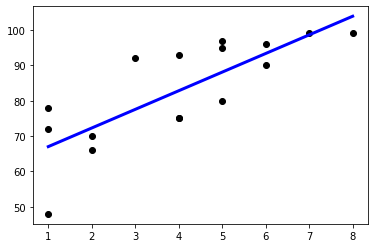

In [10]:
plt.scatter(X, y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.show()

In [11]:
import statsmodels.api  as sm
y_hat = reg.predict(X)
Xm = sm.add_constant(X)
Ym = y
Km = sm.OLS(Ym,Xm ).fit()
Km.summary()

/Users/wendellwang/Developer/ML/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     22.87
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000292
Time:                        14:18:29   Log-Likelihood:                -57.384
No. Observations:                  16   AIC:                             118.8
Df Residuals:                      14   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7569      4.984     12.391      0.000      51.067      72.447
x1             5.2639      1.101      4.782      0.000       2.903       7.625
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.358
Skew:                          -0.205   Prob(JB):                        0.836
Kurtosis:                       2.393   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
Xm = sm.add_constant(X)
Ym = y
Km = sm.WLS(Ym,Xm ).fit()
Km.summary()

/Users/wendellwang/Developer/ML/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            WLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     22.87
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000292
Time:                        14:18:29   Log-Likelihood:                -57.384
No. Observations:                  16   AIC:                             118.8
Df Residuals:                      14   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7569      4.984     12.391      0.000      51.067      72.447
x1             5.2639      1.101      4.782      0.000       2.903       7.625
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.358
Skew:                          -0.205   Prob(JB):                        0.836
Kurtosis:                       2.393   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Weight Function:
$$
\begin{aligned}
	w = \frac{1}{\hat{y}^2}
\end{aligned}
$$

In [13]:
Xm = sm.add_constant(X)
Ym = y
Km = sm.WLS(Ym,Xm,weights=1.0 / (y_hat ** 2)).fit()
Km.summary()

/Users/wendellwang/Developer/ML/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.591
Model:                            WLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     20.26
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000499
Time:                        14:18:29   Log-Likelihood:                -58.851
No. Observations:                  16   AIC:                             121.7
Df Residuals:                      14   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0397      4.852     12.580      0.000      50.633      71.446
x1             5.4496      1.211      4.501      0.000       2.853       8.047
==============================================================================
Omnibus:                        0.816   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.321
Skew:                          -0.344   Prob(JB):                        0.852
Kurtosis:                       2.905   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Weight Function:
$$
\begin{aligned}
	w = \frac{1}{\hat{y}}
\end{aligned}
$$

In [14]:
Xm = sm.add_constant(X)
Ym = y
Km = sm.WLS(Ym,Xm,weights=1.0 / (y_hat)).fit()
Km.summary()

/Users/wendellwang/Developer/ML/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            WLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     21.72
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           0.000368
Time:                        14:18:29   Log-Likelihood:                -58.067
No. Observations:                  16   AIC:                             120.1
Df Residuals:                      14   BIC:                             121.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.3708      4.911     12.497      0.000      50.838      71.903
x1             5.3604      1.150      4.660      0.000       2.893       7.827
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.289
Skew:                          -0.274   Prob(JB):                        0.865
Kurtosis:                       2.635   Cond. No.                         9.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For Weight Function:
$$
\begin{aligned}
	w = \frac{1}{(y-\hat{y})^2}
\end{aligned}
$$

In [15]:
Xm = sm.add_constant(X)
Ym = y
Km = sm.WLS(Ym,Xm,weights=1.0 / ((y-y_hat) ** 2)).fit()
Km.summary()

/Users/wendellwang/Developer/ML/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            WLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     217.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           6.39e-10
Time:                        14:18:29   Log-Likelihood:                -49.949
No. Observations:                  16   AIC:                             103.9
Df Residuals:                      14   BIC:                             105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5362      2.540     23.837      0.000      55.089      65.983
x1             5.4891      0.372     14.743      0.000       4.691       6.288
==============================================================================
Omnibus:                       19.645   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.386
Skew:                           0.098   Prob(JB):                        0.303
Kurtosis:                       1.119   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""